# WB - credit card fraud
https://www.kaggle.com/dalpozz/creditcardfraud

PYTANIA:

1. jak wyliczamy wyniki modelu? 10 krotna kroswalidacja

TO DO dla mnie (EWA):
1. doczytac co sie dzieje w tym easy ensemble i smote i zrobić ich opis
2. zrobić easy ensemble, bo tego nie ma
3. pokomentować to

#### ŁADOWANIE PAKIETÓW

In [180]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsemble
from imblearn.over_sampling import SMOTE

#### ŁADOWANIE DANYCH

In [181]:
sciezka = "C:/Users/E540/Desktop/WB credit fraud/"
dane = pd.read_csv(sciezka+"creditcard.csv")
dane.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [182]:
print("Wymiar zbioru", dane.shape)
print("Obserwacji z klasy 1: ",sum(dane.Class == 1), "\nObserwacji z klasy 0: ", sum(dane.Class == 0))
print("Ile razy wiekszy zbior z klasy 0: ", sum(dane.Class == 0)/sum(dane.Class == 1))

Wymiar zbioru (284807, 31)
Obserwacji z klasy 1:  492 
Obserwacji z klasy 0:  284315
Ile razy wiekszy zbior z klasy 0:  577.87601626


In [183]:
# rozdzielenie zmiennych objaśniających od zmiennej odpowiedzi
y = dane.Class
X = dane.drop('Class', 1)

#### PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

Undersampling będzie robiony na poniższym zbiorze treningowym. Zbiór testowy pozostanie bez zmian.

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("TRAIN: \n")
print("Wymiar zbioru treningowego", X_train.shape)
print("Obserwacji z klasy 1 w zbiorze tren: ",sum(y_train == 1), "\nObserwacji z klasy 0 w zbiorze tren: ", sum(y_train  == 0))

print("TEST: \n")
print("Wymiar zbioru testowego", X_test.shape)
print("Obserwacji z klasy 1 w zbiorze test: ",sum(y_test == 1), "\nObserwacji z klasy 0 w zbiorze test: ", sum(y_test  == 0))

TRAIN: 

Wymiar zbioru treningowego (199364, 30)
Obserwacji z klasy 1 w zbiorze tren:  356 
Obserwacji z klasy 0 w zbiorze tren:  199008
TEST: 

Wymiar zbioru testowego (85443, 30)
Obserwacji z klasy 1 w zbiorze test:  136 
Obserwacji z klasy 0 w zbiorze test:  85307


Wyliczenie granic zmiennych do wykresów na podstawie zbioru treningowego. Zmienne, które będą wizualizowane to PCA4 oraz PCA11.

In [185]:
limits_x = [int(np.min(X_train[y_train == 0].V4))-2, int(np.max(X_train[y_train == 0].V4))+2]
limits_y = [int(np.min(X_train[y_train == 0].V11))-2, int(np.max(X_train[y_train == 0].V11))+4]

Definicja funkcji rysującej zbiór oryginalny i zbiór po resamplingu:

In [186]:
def plot_resampling(ax, X, y, title, limits_x, limits_y):
    c0 = ax.scatter(X[y == 0].V4, X[y == 0].V11, label="Klasa #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1].V4, X[y == 1].V11, label="Klasa #1", alpha=0.5)
    ax.legend((c0, c1), ('Class #0', 'Class #1'), loc='upper left', ncol=1, labelspacing=0.)
    ax.set_title(title)
    ax.set_xlabel("V4")
    ax.set_ylabel("V11")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim(limits_x)
    ax.set_ylim(limits_y)
   
    
    return c0, c1

## BILANSOWANIE KLAS

#### Motywacja:

- Learning algorithms that do not consider class-imbalance tend to be overwhelmed by the majority class and ignore the minority class. For example, in a problem with imbalance level 99, a learning algorithm that minimizes error rate could decide to classify all examples as the majority class in order to achieve a low error rate of 1%. However, all minority class examples will be wrongly classified in this case. In problems where the imbalance level is huge, class-imbalance must be carefully handled to build a good classifier
    
    
- Misclassifying a minority class instance is usually more serious than misclassifying a majority class one. For example, approving a fraudulent credit card application is more costly than declining a credible one

### Prosty Undersampling

POPRAWIC OPIS Under-sampling is an efficient method for class-imbalance learning. This method uses a subset of the majority class to train the classifier. Since many majority class examples are ignored, the training set becomes more balanced and the training process becomes faster. Undersampling requires shorter training time, at the cost of ignoring potentially useful data.

Wynikowe zbiory to: X_train_under oraz y_train_under.

In [187]:
# ile jest rekordów z klasy 1
n_fraud_train = sum(y_train == 1) # sumuję liczbę obserwacji z klasy 1
class_1_indices = np.array(X_train[y_train == 1].index) # wybieram indexy wierszy z klasy 1

# losowy wybor n_fraud_tren obserwacji z klasy 0
class_0_indices = np.array(X_train[y_train == 0].index)  # wybieram indexy wierszy z klasy 0
class_0_indices = np.array(np.random.choice(class_0_indices, n_fraud_train, replace = False))  # losuje z nich niektóre

# wybieranie odpowiednich obserwacji
indexy = np.concatenate([class_1_indices, class_0_indices]) # lacze obie tablice

# Under sample dataset
X_train_under = X_train.loc[indexy] # wyciagam obserwacje z danymi wartosciami indeksu
y_train_under = y_train.loc[indexy]

print("rozmiar X po undersamplingu " , X_train_under.shape)
print("rozmiar y po undersamplingu " ,y_train_under.shape)
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_under == 1), " klasa 0: ",sum(y_train_under == 0))

rozmiar X po undersamplingu  (712, 30)
rozmiar y po undersamplingu  (712,)
rozkład klas w zbiorze treningowym, klasa 1:  356  klasa 0:  356


Wizualizacja efektu

W wyniku przeprowadzonego prostego undersamplingu, rozmiar zbioru treningowego zmniejszył się znacząco: zostało 712 obserwacji co stanowi 0.35% rozmiaru oryginalnego zbioru treningowego. Klasy są równoliczne: pozostały wszystkie obserwacje z klasy 1 i część obserwacji z klasy 0, wybrane losowo. Na wykresach poniżej możemy zaobserwować jakie obserwacje zostały włączonego do nowego zbioru treningowego.

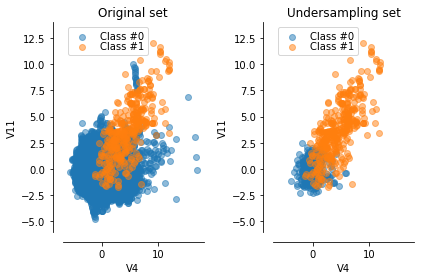

In [188]:
f, (ax1, ax2) = plt.subplots(1, 2)

plot_resampling(ax1, X_train, y_train, 'Original set', limits_x, limits_y)
plot_resampling(ax2, X_train_under, y_train_under, 'Undersampling set',  limits_x, limits_y)

plt.tight_layout()
plt.show()

### Easy Ensemble

POPRAWIC OPIS The main drawback of under-sampling is that potentially useful information contained in these ignored examples is neglected. The intuition of our proposed methods is then to wisely explore these ignored data, while keeping the fast training speed of under-sampling. One straightforward way is to sample several subsets independently from N (the majority class), use these subsets to train classifiers separately, and combine the trained classifiers.

Given the minority training set P and the majority
training set N, the under-sampling method randomly
samples a subset N0 from N, where |N 0| < |N |. Usually
we choose |N 0| = |P|, and therefore have |N 0|  |N |
for highly imbalanced problems

In
this method, we independently sample several subsets
N1,N2, . . . ,NT from N. For each subset Ni (1 
i  T), a classifier Hi is trained using Ni and all of
P. All generated classifiers are combined for the final
decision. AdaBoost [29] is used to train the classifier
Hi.

Algorithm 1 The EasyEnsemble algorithm.
1: {Input: A set of minority class examples P, a set of
majority class examples N, |P| < |N |, the number of
subsets T to sample from N, and si, the number of
iterations to train an AdaBoost ensemble Hi}
2: i ( 0
3: repeat
4: i ( i + 1
5: Randomly sample a subset Ni from N, |Ni| = |P|.
6: Learn Hi using P and Ni. Hi is an AdaBoost ensemble
with si weak classifiers hi,j and corresponding weights
i,j . The ensemble’s threshold is i, i.e.
Hi(x) = sgn
Psi
j=1 i,jhi,j(x) − i

.
7: until i = T
8: Output: An ensemble:
H(x) = sgn
PT
i=1
Psi
j=1 i,jhi,j(x) −
PT
i=1 i

.



EasyEnsemble (abbreviated as Easy). CART is
used to train weak classifiers. Number of subsets
T = 4, number of rounds in each AdaBoost
ensemble si = 10.

Ta metoda zaimplementowana w Pythonie zwraca tak naprawdę tylko n zbiorów undersamplowanych. Nasza w tym głowa by je skombinować w jeden klasyfikator...
Trzeba określić jaki klasyfikator do użycia
Trzeba określić liczbę podzbiorów (n_subsets)
Trzeba określić liczbę serii w każdym AdaBoost ensemble, zestawie Adaboost?, (10 np)
http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

Wynikowe zbiory to: ... opis

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tsmcb09.pdf

EasyEnsemble samples several subsets from the majority class, trains a learner using each of them, and combines the outputs of those learners

In [190]:
n_easy = 100
e = EasyEnsemble(n_subsets=n_easy  # bierzemy 100 zbiorów danych (przypomnienie: 577 można wziąc max, by uzyskać rozłączne zbiory)
X_train_easy, y_train_easy = e.fit_sample(X_train, y_train)

In [194]:
# zamiana typu danych na ramki i serie pakietu Pandas
X_train_easy1 =[]
y_train_easy1= []
for i in np.arange(n_easy): 
    X_train_easy1.append(pd.DataFrame(X_train_easy[i], columns= X_train.columns))
    y_train_easy1.append(pd.Series(y_train_easy[i]))
X_train_easy = X_train_easy1.copy()
y_train_easy = y_train_easy1.copy()
print("Wymiary (liczba zbiorow, wymiary zbiorow): (",len(X_train_easy),", ", X_train_easy[0].shape,")")

Wymiary (liczba zbiorow, wymiary zbiorow): ( 100 ,  (712, 30) )


Wizualiazacja paru pierwszych zbiorów

W wyniku uzyskaliśmy 100 zbiorów (rozłącznych jeśli chodzi o obserwacje z klasy 0) o rozmiarze 712 obserwacji (0.35% zbioru treningowego). Dwa przykładowe uzyskane zbiory pokazano nawykersach poniżej.

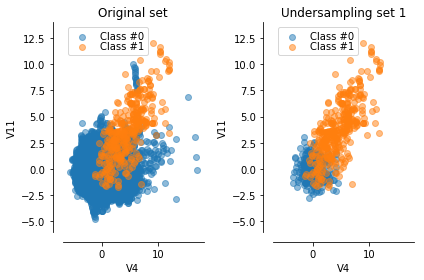

In [195]:
f, (ax1, ax2) = plt.subplots(1, 2)

plot_resampling(ax1, X_train, y_train, 'Original set', limits_x, limits_y)
plot_resampling(ax2, X_train_easy[0], y_train_easy[0], 'Undersampling set 1',  limits_x, limits_y)

plt.tight_layout()
plt.show()

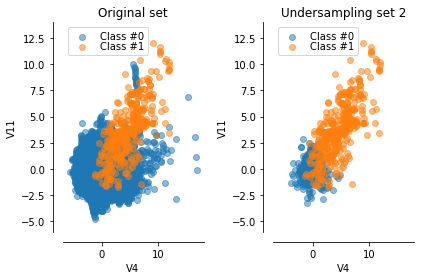

In [196]:
f, (ax1, ax2) = plt.subplots(1, 2)

plot_resampling(ax1, X_train, y_train, 'Original set', limits_x, limits_y)
plot_resampling(ax2, X_train_easy[1], y_train_easy[1], 'Undersampling set 2',  limits_x, limits_y)

plt.tight_layout()
plt.show()

Budowanie klasyfikatorów metodą Adaboost (własna implementacja), będzie trzeba chyba tylko podmienić klasyfikatory na logistic etc (robię to sama)

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
predicted = []
for i in np.arange(n_easy):
    
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(),
                             algorithm="SAMME",
                             n_estimators=20)

    adaboost.fit(X_train_easy[i], y_train_easy[i])

    predicted.append(adaboost.predict(X_train_easy[i])) # tu test czy train?

#ostateczny wynik: jak go uzyskać? artykuł patrz
#predicted_final = 
# tu do wizualizacji tego
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

##### SMOTE

TU BEDZIE LEPSZY  OPIS TEGO
Over-sampling increases the training set size, and thus requires longer training time. Furthermore, it tends to lead to overfitting since it repeats minority class examples.

SMOTE added new synthetic minority class examples by randomly interpolating pairs of closest neighbors in the minority class

Są 4 rodzaje SMOTE, ale skupimy się tylko na tym podstawowym "regular" ('svm' bardzo długo trwa swoją drogą).

Zbiory wynikowe to X_train_smote i y_train_smote.

In [197]:
sm = SMOTE(kind='regular')
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
# zmiana typy zmiennych
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

In [198]:
print("wymiary zbioru: ", X_train_smote.shape)
print("\nrozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_smote == 1), " klasa 0: ",sum(y_train_smote == 0))

wymiary zbioru:  (398016, 30)

rozkład klas w zbiorze treningowym, klasa 1:  199008  klasa 0:  199008


Wynikowy zbiór posiada 398016 obserwacji co stanowi 200% oryginalnego zbioru treningowego. Na poniższym wykresie możemy zobaczyć jak wygląda nowy zbiór treningowy.

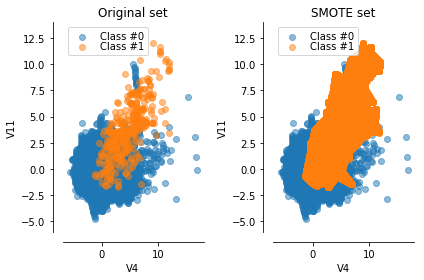

In [199]:
f, (ax1, ax2) = plt.subplots(1, 2)

plot_resampling(ax1, X_train, y_train, 'Original set', limits_x, limits_y)
plot_resampling(ax2, X_train_smote, y_train_smote, 'SMOTE set',  limits_x, limits_y)

plt.tight_layout()
plt.show()

# Modele

Marta